In [13]:
# Basic stuff we all need
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
data = pd.read_csv('../data/motor_vehicle_collisions_crashes.csv', low_memory=False)

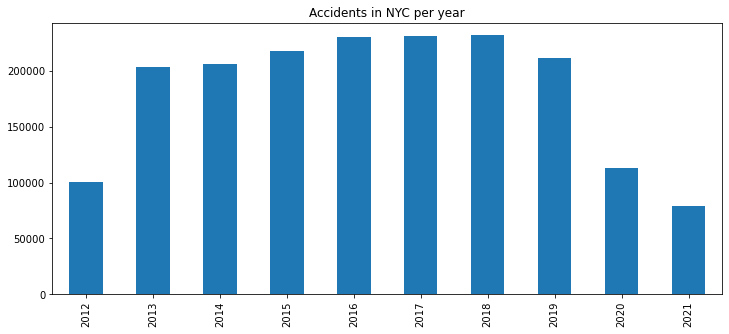

In [21]:
# Bar graph for accidents per year

yearly = pd.Series([ datetime.strptime(date, '%m/%d/%Y').year for date in data['CRASH DATE'] ]).value_counts().sort_index()
yearly_plot = yearly.plot(kind='bar', title='Accidents in NYC per year', figsize=(12, 5))
yearly_plot.figure.savefig('img/Accidents_in_NYC_per_year.png', facecolor='white')

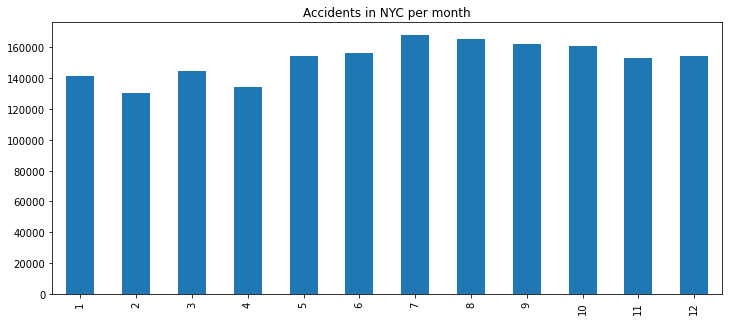

In [22]:
# Bar graph for accidents per month

monthly = pd.Series([ datetime.strptime(date, '%m/%d/%Y').month for date in data['CRASH DATE'] ]).value_counts().sort_index()
monthly_plot = monthly.plot(kind='bar', title='Accidents in NYC per month', figsize=(12, 5))
monthly_plot.figure.savefig('img/Accidents_in_NYC_per_month.png', facecolor='white')

In [ ]:
# Bar graph for accidents per hour

time_series = pd.Series([ datetime.strptime(time, '%H:%M') for time in data['CRASH TIME'] ]).value_counts().sort_index()
hourly_plot = time_series.plot(kind='line', title='Accidents in NYC by hour', figsize=(12, 5))
hourly_plot.figure.savefig('img/Accidents_in_NYC_per_hour.png', facecolor='white')

<AxesSubplot:title={'center':'Accident % by Borough'}>

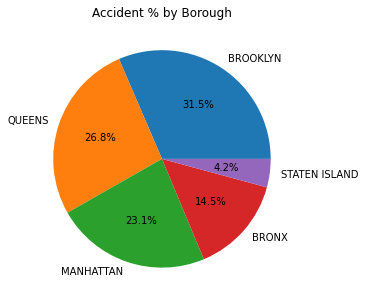

In [2]:
# Pie chart for accidents per borough

accidents_borough = data['BOROUGH'].value_counts()
pie = accidents_borough.plot.pie(title='Accident % by Borough', label='', autopct='%1.1f%%', figsize=(12, 5))
pie.figure.savefig('img/Accident % by Borough.png', facecolor='white')